<a href="https://colab.research.google.com/github/terinkov/DataAnalysis/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%965.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 5: АБ-тестирование

## Задача 1: Сравнение методов анализа конверсии (30 баллов)
**Данные:**  
- Группа A: 15,000 пользователей, 750 конверсий  
- Группа B: 17,000 пользователей, 940 конверсий

```python
# Данные
conversions = [750, 940]
trials = [15000, 17000]
```

**Требуется:**  
1. Провести Z-тест для пропорций (10 баллов)
2. Провести хи-квадрат тест (10 баллов)
3. Сравнить результаты и объяснить различия (10 баллов)

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest


# Данные
conversions = np.array([750, 940])
trials = np.array([15000, 17000])

# Z-тест для пропорций
z_stat, p_value_z = proportions_ztest(conversions, trials)
# print(f"Z-статистика: {z_stat:.4f}, p-value: {p_value:.10f}")

# Хи-квадрат тест вручную через формулу
observed = np.array([conversions, trials - conversions])
expected = np.outer(np.sum(observed, axis=1), np.sum(observed, axis=0)) / np.sum(observed)
chi2_stat = np.sum((observed - expected) ** 2 / expected)
p_value_chi2 = 1 - stats.chi2.cdf(chi2_stat, df=1)

# Вывод результатов
print(f"Z-тест: Z-статистика = {z_stat:.4f}, p-значение = {p_value_z:.5f}")
print(f"Хи-квадрат тест: статистика = {chi2_stat:.4f}, p-значение = {p_value_chi2:.5f}")

print(f"Разница p-values: {p_value_chi2-p_value_z:.4f}")

Z-тест: Z-статистика = -2.1130, p-значение = 0.03460
Хи-квадрат тест: статистика = 4.4648, p-значение = 0.03460
Разница p-values: 0.0000


### Выводы
**p-value = 0.0346 означает, что если бы не было реальной разницы между конверсиями, мы получили бы такие данные случайно только в 3.46% случаев. Так как p-value < 0.05, можно сделать вывод, что разница между группами статистически значима на уровне 5%, и группа B действительно имеет более высокий коэффициент конверсии. Это может означать, что изменение, протестированное в группе B (например, новый дизайн сайта, изменение предложения и т. д.), дествительно влияет на конверсию.**

**1. Z-тест для пропорций:**  
Формула:  
$$ Z = \frac{\hat{p}_B - \hat{p}_A}{\sqrt{\hat{p}(1-\hat{p})}(\frac{1}{n_A} + \frac{1}{n_B})} $$  
где $\hat{p} = \frac{n_A\hat{p}_A + n_B\hat{p}_B}{n_A + n_B}$  

**2. Хи-квадрат тест:**  
Формула:  
$$ \chi^2 = \sum \frac{(O - E)^2}{E} $$  

**Объяснение различий:**  
* Z-тест применяется для проверки гипотезы о разнице долей конверсий между двумя группами. Он основан на предположении, что распределение разности пропорций асимптотически **нормально** при достаточно больших выборках
* Хи-квадрат тест в данном случае используется для проверки независимости между группой (A или B) и конверсией (есть/нет). Использует **Хи-квадрат** распределение
* В нашем тесте (Z-статистика)^2 и Хи-квадрат статистика совпадают, так как у Хи-квадрат 1 степень свободы, и Хи-квадрат распределение совпадает по распределению с квадратом нормального распределения, которое имеет Z-статистика. Это верно в случае большой выборки (Так как Z-тест предполагает ассимптотически нормальное распределение, требуется достаточно большая выборка.)

## Задача 2: Анализ выживаемости на Титанике (60 баллов)
**Данные:** Датсет Titanic из библиотеки seaborn    
**Требуется:**
1. Можно ли  считать, что
    - Распределние возраста пассажиров в первом классе и в третьем классе -- нормальное (тест Шапиро-Уилка)? (10 баллов)
    - Дисперсии гомогенны для возраста пассажиров в первом классе и в третьем классе (тест Левена)? (10 баллов)

2. Проверить гипотезу о том, что пассажиры 1-го класса имели более высокую выживаемость, чем 3-го класса:
    - Проверить условия применимости тестов: Z-тест для пропорций и хи-квадрат тест (10 баллов)
    - Провести Z-тест для пропорций (10 баллов)
    - Провести хи-квадрат тест (10 баллов)
    - Сравнить результаты и объяснить различия (10 баллов)

### 1. Можно ли  считать, что
    - Распределние возраста пассажиров в первом классе и в третьем классе -- нормальное (тест Шапиро-Уилка)?
    - Дисперсии гомогенны для возраста пассажиров в первом классе и в третьем классе (тест Левена)?

Проверка нормальности возраста:
Тест Шапиро-Уилка (1-й класс): p-value = 0.36426
Тест Шапиро-Уилка (3-й класс): p-value = 0.00000

Тест Левена для возраста: p-value = 0.0006


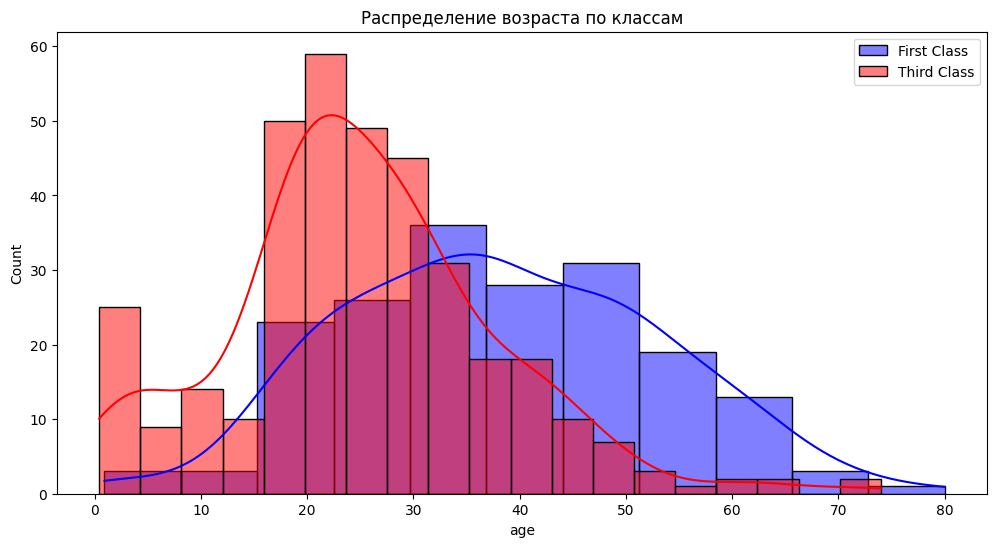

In [ ]:
import seaborn as sns
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt

# Загрузка данных
titanic = sns.load_dataset('titanic')
class1 = titanic[titanic['class'] == 'First']
class3 = titanic[titanic['class'] == 'Third']

# your code start
# Фильтрация данных по классам
class1_age = titanic[titanic['class'] == 'First']['age'].dropna()
class3_age = titanic[titanic['class'] == 'Third']['age'].dropna()

# Тест Шапиро-Уилка на нормальность
shapiro_class1 = shapiro(class1_age)
shapiro_class3 = shapiro(class3_age)

print("Проверка нормальности возраста:")
print(f"Тест Шапиро-Уилка (1-й класс): p-value = {shapiro_class1.pvalue:.5f}")
print(f"Тест Шапиро-Уилка (3-й класс): p-value = {shapiro_class3.pvalue:.5f}\n")

# Тест Левена на равенство дисперсий
levene_test = levene(class1_age, class3_age)

print(f"Тест Левена для возраста: p-value = {levene_test.pvalue:.4f}")

# end your code

# Визуализация
plt.figure(figsize=(12,6))
sns.histplot(class1['age'].dropna(), kde=True, color='blue', label='First Class')
sns.histplot(class3['age'].dropna(), kde=True, color='red', label='Third Class')
plt.title('Распределение возраста по классам')
plt.legend()
plt.show()

### Выводы
1. **Нормальность возраста:**  
* Первый класс (p-value = 0.36426):
p-value > 0.1, это означает, что мы не отвергаем нулевую гипотезу. Таким образом, можно считать, что распределение возраста пассажиров в первом классе нормально.
* Третий класс (p-value = 0.00000):
p-value <= 0.1, это означает, что мы отвергаем нулевую гипотезу. Таким образом, можно сказать, что распределение возраста пассажиров в третьем классе не является нормальным.
2. **Гомогенность дисперсий возраста:**  
   - $p = 0.10000 \Rightarrow$ дисперсии значимо различаются
* p-value < 0.1, это означает, что мы отвергаем нулевую гипотезу. То есть, дисперсии возраста пассажиров в первом и третьем классах разные (не гомогенны).

**Рекомендации:**  
- Для возраста использовать непараметрические тесты (Манна-Уитни) для проверки различий между возрастами пассажиров 1-го и 3-го классов, так как распределение возраста в 3-м классе не является нормальным и дисперсии разные.
- Для пропорций использовать (например для выживаемости, что проверяем далее) Z-тест или Хи-квадрат, так как эти тесты подходят для категориальных данных и не зависят от нормальности распределения (при достаточно больших выборках).

In [ ]:
# Здесь еще решил проверить тестом Манна-Уитни что одинаковы распределения возрастов 1 и 3 класса на Титанике:
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Загружаем датасет Titanic
titanic = sns.load_dataset('titanic')

# Фильтруем данные для 1-го и 3-го класса
class_1 = titanic[titanic['pclass'] == 1]
class_3 = titanic[titanic['pclass'] == 3]

# Извлекаем возраст пассажиров для 1-го и 3-го класса, убираем пропуски
age_class_1 = class_1['age'].dropna()
age_class_3 = class_3['age'].dropna()

# 1. Тест Манна-Уитни для проверки различий в возрасте между классами
statistic, p_value_mann_whitney = stats.mannwhitneyu(age_class_1, age_class_3)

# Выводим результаты
print(f"Тест Манна-Уитни: статистика = {statistic:.5f}, p-value = {p_value_mann_whitney:.10f}")

# Интерпретация
if p_value_mann_whitney < 0.05:
    print("Есть статистически значимая разница между возрастами пассажиров 1-го и 3-го классов. Значит считаем, что распределены не одинаково")
else:
    print("Нет статистически значимой разницы между возрастами пассажиров 1-го и 3-го классов.")


Тест Манна-Уитни: статистика = 49572.00000, p-value = 0.0000000000
Есть статистически значимая разница между возрастами пассажиров 1-го и 3-го классов. Значит считаем, что распределены не одинаково


### 2. Проверить гипотезу о том, что пассажиры 1-го класса имели более высокую выживаемость, чем 3-го класса:
    - Проверить условия применимости тестов: Z-тест для пропорций и хи-квадрат тест
    - Провести Z-тест для пропорций
    - Провести хи-квадрат тест
    - Сравнить результаты и объяснить различия

**Условия для применения Z-теста для пропорций и Хи-квадрат теста следующие:**


*   Выборки должны быть большими (216 и 487 - достаточно большой размер выборки, поэтому считаем выполненным)
*    Проверка частот (ниже)



In [ ]:
# Проверка применимости тестов:
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Загружаем датасет Titanic
titanic = sns.load_dataset('titanic')

# Фильтруем данные для 1-го и 3-го класса
class_1 = titanic[titanic['pclass'] == 1]
class_3 = titanic[titanic['pclass'] == 3]

# Пропорция выживших для каждого класса
n1 = len(class_1)  # количество пассажиров в 1-м классе
x1 = class_1['survived'].sum()  # количество выживших в 1-м классе
p1 = x1 / n1  # пропорция выживших в 1-м классе

n3 = len(class_3)  # количество пассажиров в 3-м классе
x3 = class_3['survived'].sum()  # количество выживших в 3-м классе
p3 = x3 / n3  # пропорция выживших в 3-м классе

# 1. Проверка условий для Z-теста (условие нормальности пропорций)
# Проверяем, что ожидаемое количество успехов и неудач >= 5 для каждой группы
expected_success_1 = n1 * p1
expected_failure_1 = n1 * (1 - p1)

expected_success_3 = n3 * p3
expected_failure_3 = n3 * (1 - p3)

print(f"Для 1-го класса: ожидания успехов = {expected_success_1:.2f}, неудач = {expected_failure_1:.2f}")
print(f"Для 3-го класса: ожидания успехов = {expected_success_3:.2f}, неудач = {expected_failure_3:.2f}")

# Проверка, что все ожидания >= 5
z_test_conditions_met = (expected_success_1 >= 5 and expected_failure_1 >= 5 and
                          expected_success_3 >= 5 and expected_failure_3 >= 5)

if z_test_conditions_met:
    print("Условия для Z-теста соблюдены: Ожидаемое количество успехов и неудач >= 5 для каждой группы.")
else:
    print("Условия для Z-теста НЕ соблюдены: Ожидаемое количество успехов или неудач < 5.")

# 2. Хи-квадрат тест (таблица сопряженности)
# Формирование таблицы сопряжённости для выживших и невыживших
observed = np.array([[x1, n1 - x1], [x3, n3 - x3]])

# Ожидаемые значения для хи-квадрат теста
expected = np.outer(np.sum(observed, axis=1), np.sum(observed, axis=0)) / np.sum(observed)

# Проверка, что ожидаемые частоты >= 5
print("\nОжидаемые частоты для хи-квадрат теста:")
print(expected)

# Проверка условий для хи-квадрат теста (все ли ожидаемые частоты >= 5)
chi_square_conditions_met = np.all(expected >= 5)

if chi_square_conditions_met:
    print("Условия для хи-квадрат теста соблюдены: Ожидаемые частоты >= 5 для каждой ячейки.")
else:
    print("Условия для хи-квадрат теста НЕ соблюдены: Некоторые ожидаемые частоты < 5.")


Для 1-го класса: ожидания успехов = 136.00, неудач = 80.00
Для 3-го класса: ожидания успехов = 119.00, неудач = 372.00
Условия для Z-теста соблюдены: Ожидаемое количество успехов и неудач >= 5 для каждой группы.

Ожидаемые частоты для хи-квадрат теста:
[[ 77.90664781 138.09335219]
 [177.09335219 313.90664781]]
Условия для хи-квадрат теста соблюдены: Ожидаемые частоты >= 5 для каждой ячейки.


In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Для 1-го класса
n1 = len(class_1)  # количество пассажиров в 1-м классе
x1 = class_1['survived'].sum()  # количество выживших в 1-м классе

# Для 3-го класса
n3 = len(class_3)  # количество пассажиров в 3-м классе
x3 = class_3['survived'].sum()  # количество выживших в 3-м классе

# 1. Z-тест для пропорций
p1 = x1 / n1  # пропорция выживших в 1-м классе
p3 = x3 / n3  # пропорция выживших в 3-м классе

# комбинированная пропорция
p = (x1 + x3) / (n1 + n3)

# стандартная ошибка
se = np.sqrt(p * (1 - p) * (1/n1 + 1/n3))

# Z-статистика
z = (p1 - p3) / se

# p-value для Z-теста
p_value_z = 2 * (1 - stats.norm.cdf(np.abs(z)))

print(f"Z-тест: Z-статистика = {z:.5f}, p-value = {p_value_z:.10f}")

# 2. Хи-квадрат тест
# Формирование таблицы сопряжённости
observed = np.array([[x1, n1 - x1], [x3, n3 - x3]])

# Хи-квадрат тест
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(observed)

print(f"Хи-квадрат тест: статистика = {chi2_stat:.5f}, p-value = {p_value_chi2:.10f}")

# 3. Объяснение различий
if p_value_z < 0.05 and p_value_chi2 < 0.05:
    explanation = "Обе статистики (Z-тест и хи-квадрат тест) подтверждают, что выживаемость пассажиров 1-го класса выше, чем 3-го класса."
else:
    explanation = "Результаты не подтверждают статистически значимую разницу."

print("\nОбъяснение различий:")
print(explanation)


Z-тест: Z-статистика = 9.87754, p-value = 0.0000000000
Хи-квадрат тест: статистика = 95.89348, p-value = 0.0000000000

Объяснение различий:
Обе статистики (Z-тест и хи-квадрат тест) подтверждают, что выживаемость пассажиров 1-го класса выше, чем 3-го класса.


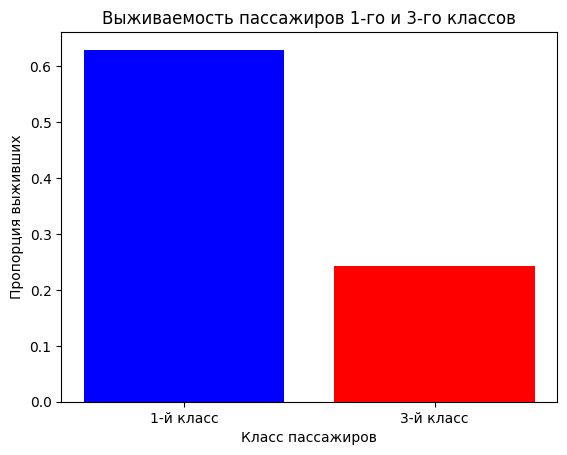

In [ ]:

# Подсчёт выживаемости для 1-го и 3-го классов
survived_class_1 = class_1['survived'].mean()  # пропорция выживших в 1-м классе
survived_class_3 = class_3['survived'].mean()  # пропорция выживших в 3-м классе

# Данные для гистограммы
labels = ['1-й класс', '3-й класс']
survival_rates = [survived_class_1, survived_class_3]

# Построение гистограммы
plt.bar(labels, survival_rates, color=['blue', 'red'])

# Добавляем подписи и заголовок
plt.xlabel('Класс пассажиров')
plt.ylabel('Пропорция выживших')
plt.title('Выживаемость пассажиров 1-го и 3-го классов')

# Отображаем график
plt.show()

### Выводы
**Данные:**  
- 1-й класс: 216 пассажиров, 136 выживших (63%)  
- 3-й класс: 491 пассажиров, 119 выживших (24%)  

**1. Z-тест для пропорций:**  
Формула:  
$$ Z = \frac{p_1 - p_3}{\sqrt{p(1-p)(\frac{1}{n_1} + \frac{1}{n_3})}} = 9.87754 $$  
где $p = \frac{x_1 + x_3}{n_1 + n_3} = \frac{136+119}{216+487} ≈ 0.325$  

**2. Хи-квадрат тест:**  
Проверяет независимость класса и выживаемости:  
$$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} = 95.89348 $$

**Результаты:**  
- Z-test p-value: 0.000000  
- Chi-square p-value: 0.000000  

**Объяснение различий:**  
- Z-тест: p-value = 0.0000000000, что значительно меньше уровня значимости 0.05. Это свидетельствует о том, что различие между пропорциями выживших в 1-м и 3-м классах является статистически значимым
- Хи-квадрат тест: p-value = 0.0000000000, что подтверждает статистическую значимость различия между выживаемостью в 1-м и 3-м классах.

- Оба теста (Z-тест и хи-квадрат тест) дают одинаково сильные результаты, подтверждая, что пассажиры 1-го класса имеют значительно более высокую выживаемость по сравнению с пассажирами 3-го класса на Титанике. Z-тест проверяет разницу между пропорциями выживших в двух группах, и высокий Z-статистический показатель (большой по модулю) подтверждает значительное различие. Хи-квадрат тест проверяет зависимость между классом пассажира и выживаемостью, и полученная статистика указывает на наличие такой зависимости. Таким образом, результаты обоих тестов подтверждают, что **пассажиры 1-го класса имели гораздо выше вероятность выживания по сравнению с пассажирами 3-го класса**.